# Wine Quality

### Importimg library and Dataset

- Pandas is a useful library in data handling.
- Numpy library used for working with arrays.
- Seaborn/Matplotlib are used for data visualisation purpose.
- Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
- XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Now let’s look at the first five rows of the dataset.

In [162]:
df= pd.read_csv('./dataset/wine_quality.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Let’s explore the type of data present in each of the columns present in the dataset.

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Now we’ll explore the descriptive statistical measures of the dataset.

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


## exploratory data analyse
$EDA$ is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.

In [165]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Let’s impute the missing values by means as the data present in the different columns are continuous values.

In [166]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col]= df[col].fillna(df[col].mean())
df.isnull().sum().sum()

0

Let’s draw the $histogram$ to visualise the distribution of the data with continuous values in the columns of the dataset.

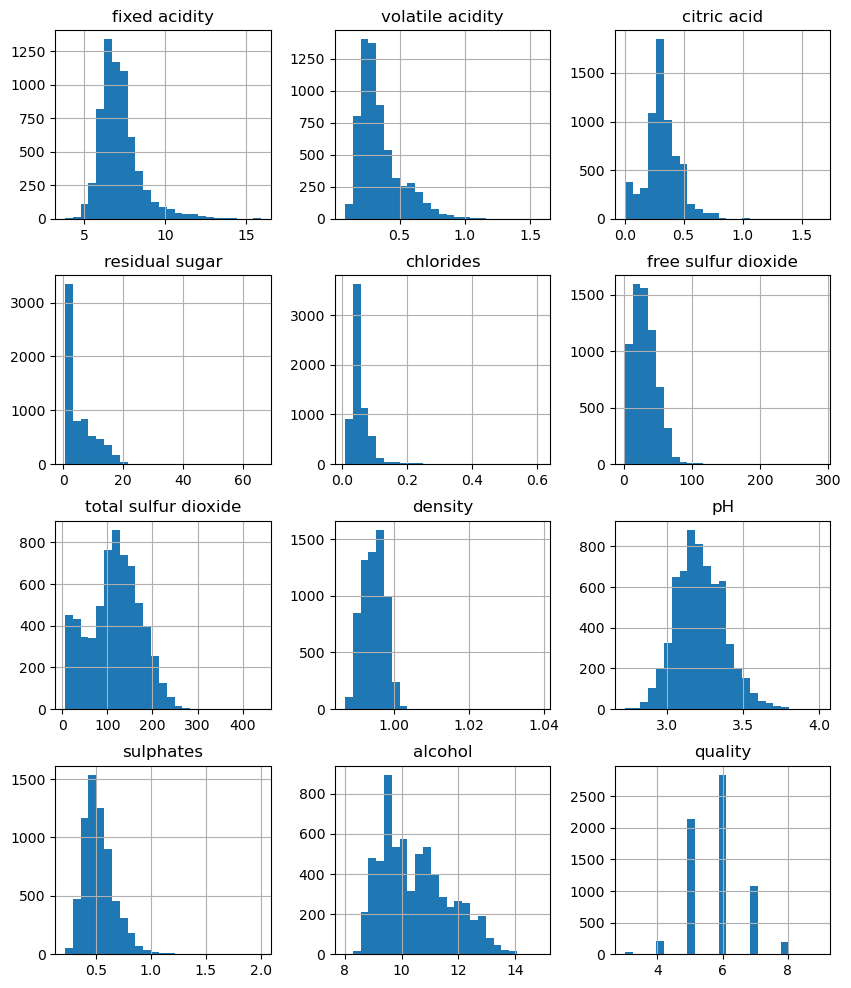

In [167]:
df.hist(bins=25, figsize=(10, 12))
plt.show()

Now let’s draw the count plot to visualise the number data for each quality of wine.

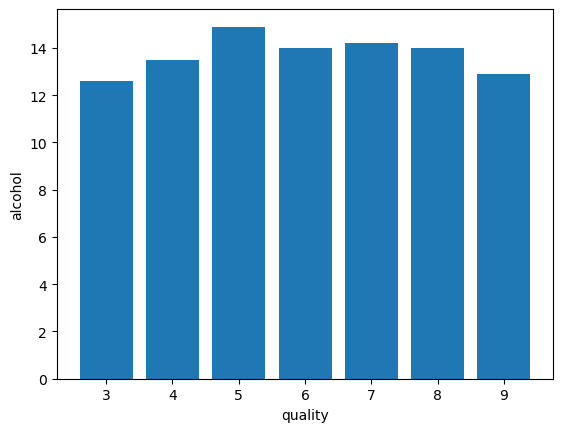

In [168]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model

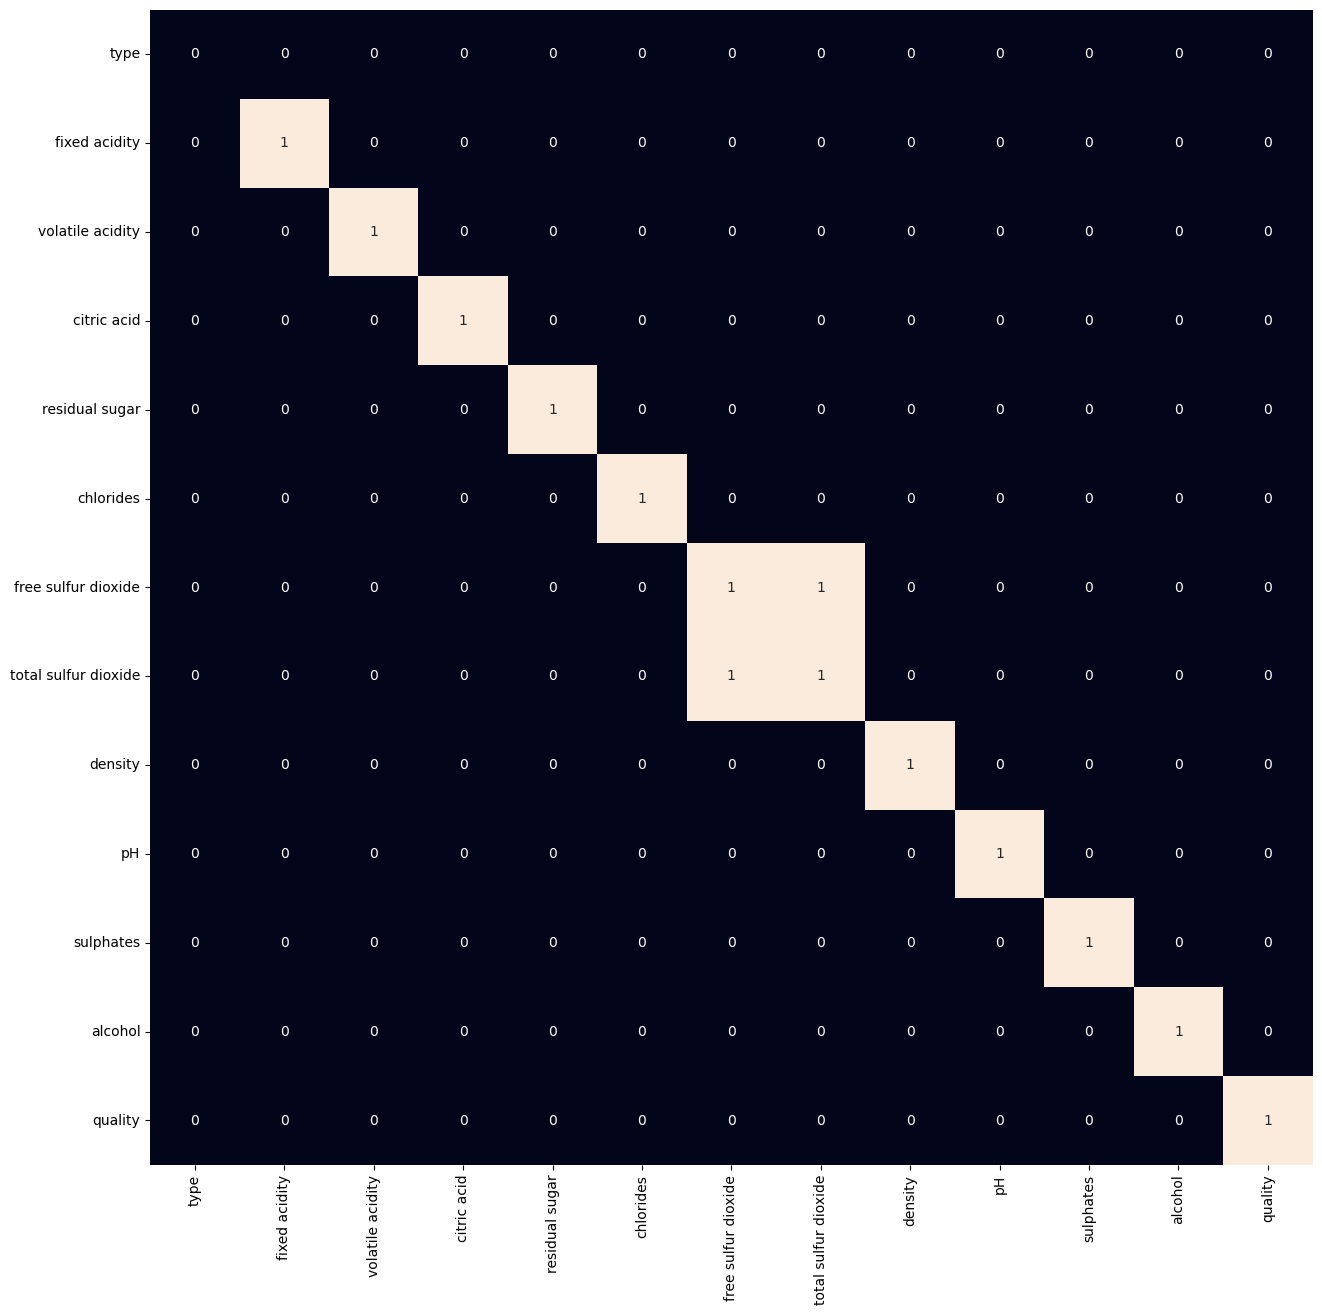

In [169]:
# we back up type columns
df['type_backup']= df['type']
# Convert 'object' columns to numerical if they represent numbers
for col in df.columns[: -1]:
    if df[col].dtype == 'object':
        try:
            df[col]= pd.to_numeric(df[col], errors= 'coerce') # Convert to numeric, replace non-convertibles with NaN
        except:
            pass # Skip columns that cannot be converted
        
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.7, annot=True, cbar= False )
plt.show()

From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.

In [170]:
df= df.drop('total sulfur dioxide', axis= 1)

## Model Development
Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [171]:
df['best quality']= [1 if x > 5 else 0 for x in df.quality]

In [172]:
df['type']= df['type_backup'] # back it up type coloumn for modelizing
df= df.drop('type_backup', axis= 1)

We have a column with object data type as well let’s replace it with the 0 and 1 as there are only two categories.

In [173]:
df.replace({'white': 1, 'red': 0}, inplace= True)

After segregating features and the target variable from the dataset we will split it into 80:20 ratio for model selection.

In [174]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [177]:
features= df.drop(columns=['quality', 'best quality'])
features= features.fillna(features.mean())
target= df['best quality']

In [178]:
xtrain, xtest, ytrain, ytest= train_test_split(
features, target,test_size= 0.2, random_state=50)
# Impute missing values after splitting
imputer= SimpleImputer(strategy= 'mean')
xtrain= imputer.fit_transform(xtrain)
xtest= imputer.transform(xtest)
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

$Normalising$ the data before training help us to achieve stable and fast training of the model.

In [179]:
norm= MinMaxScaler()
xtrain= norm.fit_transform(xtrain)
xtest= norm.transform(xtest)

As the data has been prepared completely let’s train some state of the art machine learning model on it.

In [182]:
models=[LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(3):
    models[i].fit(xtrain, ytrain)
    
    print(f'{models[i]}:')
    print('Training Accuracy: ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy: ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))

LogisticRegression():
Training Accuracy:  0.7073218105573715
Validation Accuracy:  0.694560532845762
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy:  0.972221262257549
Validation Accuracy:  0.7833355099908581
SVC():
Training Accuracy:  0.7114422189263435
Validation Accu

## Model Evaluation
From the above accuracies we can say that Logistic Regression and SVC() classifier performing better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix as well for the validation data for all 3 models.

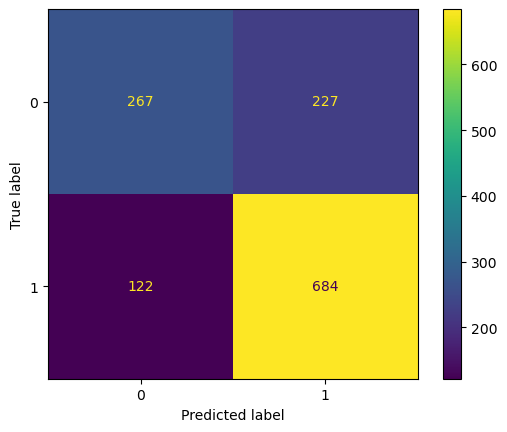

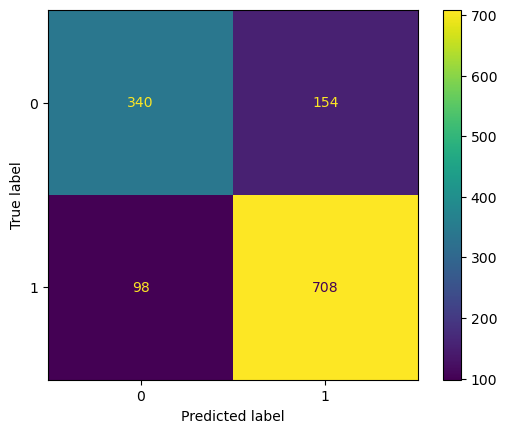

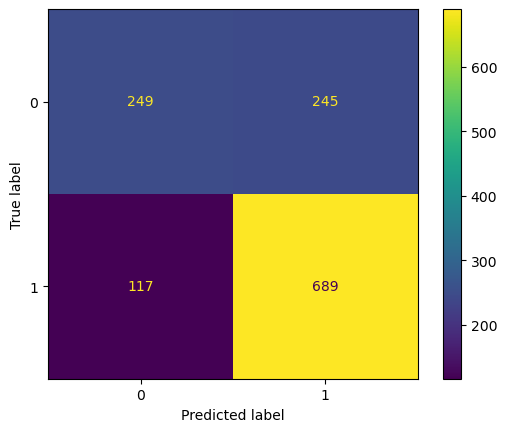

In [184]:
for i in range(3):
    cm= metrics.confusion_matrix(ytest, models[i].predict(xtest))
    cm_disp= metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[i].classes_)
    cm_disp.plot()
    plt.show()

Let’s also print the classification report for the all 3 performing model.

In [185]:
for i in range(3):
    print(metrics.classification_report(ytest, models[i].predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       494
           1       0.75      0.85      0.80       806

    accuracy                           0.73      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.73      0.72      1300

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       494
           1       0.82      0.88      0.85       806

    accuracy                           0.81      1300
   macro avg       0.80      0.78      0.79      1300
weighted avg       0.80      0.81      0.80      1300

              precision    recall  f1-score   support

           0       0.68      0.50      0.58       494
           1       0.74      0.85      0.79       806

    accuracy                           0.72      1300
   macro avg       0.71      0.68      0.69      1300
weighted avg       0.72      0.72      0.71      1300

